In [1]:
import tensorflow as tf  # ML 백엔드로 사용
from keras.models import Sequential  # ML 프론트엔드로 사용
from keras.layers import Dense
import pandas as pd  # csv 파일 불러오기에 사용
import numpy as np  # TF는 numpy 배열로 입력시켜야 함
from matplotlib import pyplot as plt  # 그래프를 그리기 위해 사용
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import shap

sns.set(font_scale=1.3)

In [24]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/valid.csv")

```
id : 회원정보
diagnosis : 진단(B: 양성종양, M: 악성종양)
radius_mean : 둘레정보
texture_mean : 질감정보(세포 탄력)
perimeter_mean 
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
```

In [25]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                284 non-null    object 
 1   radius_mean              284 non-null    float64
 2   texture_mean             284 non-null    float64
 3   perimeter_mean           284 non-null    float64
 4   area_mean                284 non-null    float64
 5   smoothness_mean          284 non-null    float64
 6   compactness_mean         284 non-null    float64
 7   concavity_mean           284 non-null    float64
 8   concave points_mean      284 non-null    float64
 9   symmetry_mean            284 non-null    float64
 10  fractal_dimension_mean   284 non-null    float64
 11  radius_se                284 non-null    float64
 12  texture_se               284 non-null    float64
 13  perimeter_se             284 non-null    float64
 14  area_se                  2

In [26]:
y_train = train["diagnosis"]
y_test = test["diagnosis"]

In [27]:
X_train = train.drop("diagnosis", axis=1)
X_test = test.drop("diagnosis", axis=1)

In [28]:
y_train = y_train == "M"
y_test = y_test == "M"

In [29]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [30]:
mean_columns = [col for col in X_train.columns if "mean" in col]
X_train_mean = X_train[mean_columns]

se_columns = [col for col in X_train.columns if "_se" in col]
X_train_se = X_train[se_columns]

worst_columns = [col for col in X_train.columns if "_worst" in col]
X_train_worst = X_train[worst_columns]

mean_columns = [col for col in X_test.columns if "mean" in col]
X_test_mean = X_test[mean_columns]

se_columns = [col for col in X_test.columns if "_se" in col]
X_test_se = X_test[se_columns]

worst_columns = [col for col in X_test.columns if "_worst" in col]
X_test_worst = X_test[worst_columns]

In [31]:
X_train_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431
...,...,...,...,...,...,...,...,...,...,...
279,26.680,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
280,16.300,28.39,108.10,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463
281,12.330,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
282,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230


In [32]:
X_train_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960
3,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898
4,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621
...,...,...,...,...,...,...,...,...,...,...
279,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398
280,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746
281,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667
282,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800


In [33]:
mms = MinMaxScaler()

In [34]:
mms.fit(X_train_mean)

MinMaxScaler()

mean

In [35]:
X_train_mean = mms.transform(X_train_mean)
X_train_mean

array([[0.2366567 , 0.4124241 , 0.22134815, ..., 0.10041819, 0.32204397,
        0.22535805],
       [0.36337371, 0.63054647, 0.37572171, ..., 0.46408782, 0.40225787,
        0.35299073],
       [0.12565259, 0.24147595, 0.11698903, ..., 0.06743335, 1.        ,
        0.41364785],
       ...,
       [0.18343555, 0.43577767, 0.16931293, ..., 0.11657083, 0.27094474,
        0.14132266],
       [0.58183385, 0.70481084, 0.60666859, ..., 0.58442237, 0.79441474,
        0.59056445],
       [0.36388058, 0.32508174, 0.36301963, ..., 0.46644015, 0.65181224,
        0.37320977]])

In [36]:
X_test_mean = mms.transform(X_test_mean)
X_test_mean

array([[0.45156876, 0.85801028, 0.43273672, ..., 0.2771563 , 0.31491384,
        0.13732098],
       [0.26909625, 0.72022419, 0.24732968, ..., 0.09210664, 0.36066548,
        0.09540859],
       [0.19661412, 0.43577767, 0.18663395, ..., 0.07464715, 0.57694593,
        0.26769166],
       ...,
       [0.23868417, 0.37225596, 0.23910219, ..., 0.14631469, 0.44622698,
        0.44355518],
       [0.25135587, 0.39514246, 0.24790704, ..., 0.26523785, 0.34521687,
        0.39132266],
       [0.05246084, 0.28584773, 0.05412818, ..., 0.10057501, 0.34997029,
        0.55539174]])

In [37]:
model = tf.keras.models.Sequential()

In [38]:
model.add(
    tf.keras.layers.Dense(10, input_dim=10, activation="relu")
)  # input_dim은 컬럼개수와 같게 만들어주기
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # 이진분류를 할거라 1로 설정

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
tf_model_mean = model.fit(
    X_train_mean, y_train, epochs=30, batch_size=10
)  # 이렇게 저장하면 history가 되어서 표나 시각화할 수 있음(시각화를 추천)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5388 - loss: 0.6760   
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8813 - loss: 0.6345
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8991 - loss: 0.5869
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9322 - loss: 0.5151
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9226 - loss: 0.4627
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9372 - loss: 0.4063
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step - accuracy: 0.9037 - loss: 0.3533
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8813 - loss: 0.3543
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.9137 - loss: 0.2609
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9430 - loss: 0.2249
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9643 - loss: 0.2019
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step 

In [41]:
# 검증
model.evaluate(X_test_mean, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9299 - loss: 0.1487  


[0.1513858288526535, 0.9260563254356384]

Text(0.5, 1.0, 'accuracy')

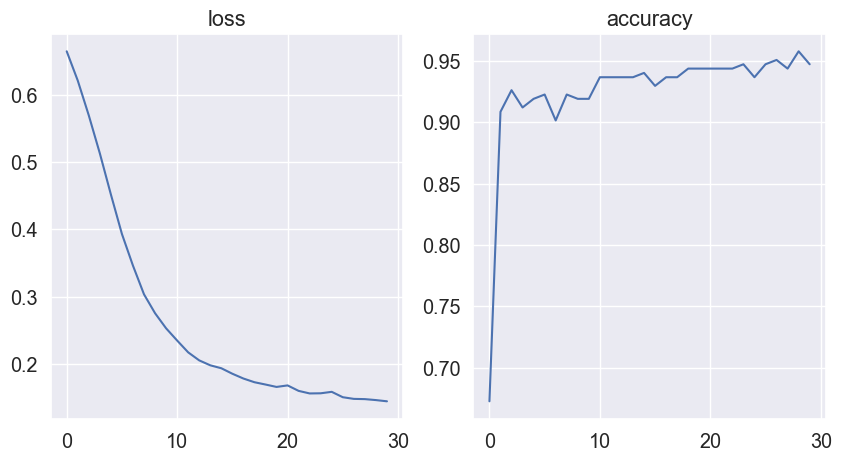

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tf_model_mean.history["loss"])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.plot(tf_model_mean.history["accuracy"])
plt.title("accuracy")

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train_se

In [ ]:
y_train

In [ ]:
tf_model_mean = model.fit(
    X_train_se, y_train, epochs=30, batch_size=10
)  # 이렇게 저장하면 history가 되어서 표나 시각화할 수 있음(시각화를 추천)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.6235 - loss: 2.2494 
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.4267 - loss: 0.8312
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.4138 - loss: 0.7165
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.4045 - loss: 0.7032
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.4516 - loss: 0.6473
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.6410 - loss: 0.5869
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.7471 - loss: 0.5722
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8678 - loss: 0.5359
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8326 - loss: 0.5122
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8668 - loss: 0.4968
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8304 - loss: 0.4970
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/ste

In [ ]:
# 검증
model.evaluate(X_test, y_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 30)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30), dtype=float32)
  • training=False
  • mask=None

Text(0.5, 1.0, 'accuracy')

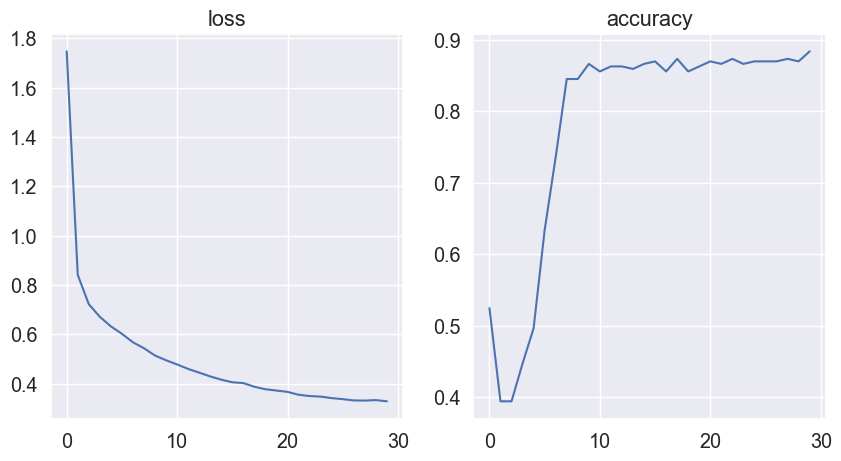

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(tf_model_mean.history["loss"])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.plot(tf_model_mean.history["accuracy"])
plt.title("accuracy")

[loss]
- 급격히 주는 구간이 있는가
- 들쭉날쭉한가(삐죽하게 나오는 것)
- 변동이 어떤가
- 상하대칭이 아닌가
- acc랑 상하대칭이 아닌 것이 있는가
    ```
    이상적인 그래프 : 완만하게 내려가는 그래프
    문제가 있는 그래프 : 삐죽하게 나온 그래프
    ```
[acc]
- 로그 모양이랑 비슷하게 나오는가
- 갑자기 줄어드는 구간이 있는가(극초반은 괜찮)
- 불규칙하게 늘었다 줄었다
- 변동하지 않는 구간이 있는가

In [30]:
y_pred = model.predict(X_test) > 0.5

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (32, 30)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 30), dtype=float32)
  • training=False
  • mask=None

In [ ]:
y2 = y_test.values.reshape((-1, 1))

In [ ]:
y3 = y2 == y_pred

In [ ]:
y3.sum()

In [ ]:
y3.sum() / y3.shape[0]

In [ ]:
X_train

In [ ]:
X_train.columns

In [ ]:
corr_matrix = X_train.corr()

In [ ]:
corr_matrix.sort_values